In [12]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
import seaborn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from collections import OrderedDict
import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [13]:
fLauCounter = pd.read_csv(r"E:\netData\MAG-nobel\2 Nobel laureates counterparts\counterparts.zip")
fLau = pd.read_csv(r"E:\netData\MAG-nobel\361 Nobel laureates.csv")

In [14]:
fLau['Pub year']=fLau['Laureate name'].map(Nobelpapers.drop_duplicates(subset = 'Laureate name').set_index('Laureate name')['Pub year'])

In [15]:
fLauCounter0 = fLauCounter[['Field','Laureate name','pub num', 'total cit', 'h', 'g', 'max cit', 'max2', 'max3', 'max4', 'max5','If Prize']]
fLauCounter0.columns = ['Field','Laureate name','Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr','If Prize']

In [18]:
fLau0 = fLau[['field','Laureate name','pub num', 'total cit', 'h', 'g', 'max cit', 'max2', 'max3', 'max4', 'max5']]
fLau0['If Prize'] = 1
fLau0.columns = ['Field','Laureate name','Pub Num','Total Cit', 'h-index', 'g-index','1 Repr','2 Repr','3 Repr','4 Repr','5 Repr','If Prize']

In [19]:
fLau1 = fLau0[fLau0['Field']=='Physics']
fLau2 = fLau0[fLau0['Field']=='Chemistry']
fLau3 = fLau0[fLau0['Field']=='Medicine ']

In [21]:
fLauCounter1 = fLauCounter0[fLauCounter0['Field']=='Physics']
fLauCounter2 = fLauCounter0[fLauCounter0['Field']=='Chemistry']
fLauCounter3 = fLauCounter0[fLauCounter0['Field']=='Medicine']

In [22]:
ff1 = pd.concat([fLau1 , fLauCounter1], ignore_index=True)
ff2 = pd.concat([fLau2 , fLauCounter2], ignore_index=True)
ff3 = pd.concat([fLau3 , fLauCounter3], ignore_index=True)

In [23]:
ff3.dropna(inplace = True)

# Logistic regression

In [24]:
scaler = MinMaxScaler()

In [25]:
ff1['target'] = ff1['If Prize']
data = ff1
data[data.columns[2:-1]] = scaler.fit_transform(data[data.columns[2:-1]])
predictors = [ 'Pub Num','1 Repr']
model = sm.MixedLM(endog=data['target'], exog=data[predictors], groups=data['Laureate name']).fit()

print(model.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: target   
No. Observations: 994     Method:             REML     
No. Groups:       120     Scale:              0.1121   
Min. group size:  2       Log-Likelihood:     -337.3014
Max. group size:  11      Converged:          No       
Mean group size:  8.3                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Pub Num      -0.264    0.033 -8.091 0.000 -0.328 -0.200
1 Repr        0.975    0.127  7.660 0.000  0.725  1.224
Group Var     0.003                                    



In [26]:
coefficients = model.params.values
std_err = model.bse.values
p_values = model.pvalues.values

In [27]:
plt.rcParams['font.sans-serif'] = ['Arial']

In [33]:
def draw(i , j , f , predictors):
    f['target'] = f['If Prize']
    data = f
    data[data.columns[2:-1]] = scaler.fit_transform(data[data.columns[2:-1]])
    model = sm.MixedLM(endog=data['target'], exog=data[predictors], groups=data['Laureate name']).fit()
    coefficients = model.params.values[:2]
    std_err = model.bse.values[:2]
    p_values = model.pvalues.values[:2]
    x = [0,3]
    y_err = std_err[:2]
    y = coefficients
    ax = plt.subplot(4,3,i*3+j+1)
    ax.errorbar(x, y, yerr=y_err, capsize=18, markersize=40 ,c = '#943126')
    ax.scatter(x, y, c='#943126', s=200)
    for i, sig in enumerate(p_values):
        if sig < 0.01:
            ax.plot(x[i], y[i], 'o', markersize=25  ,c = '#943126', label = 'p < 0.01')
        elif sig < 0.05:
            ax.plot(x[i], y[i], 'o', markersize=25, markerfacecolor='orange' , label = 'p < 0.05')
        else:
            ax.plot(x[i], y[i], 'o', markersize=25, markerfacecolor='green' , label = 'p > 0.1')
    ax.set_xlim(-1, 4)
    plt.axhline(y=0 , c = '#212F3C' , ls='-.')
    plt.yticks(fontsize = 30)
    plt.xticks([0,3],predictors,fontsize=30)  
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys() , fontsize=30 , loc = 'upper left')
    ax.set_ylabel('coefficient',fontsize=30)

In [34]:
plst1 = ['1 Repr' , '1 Repr', '1 Repr']
plst2 = ['Pub Num','Total Cit', 'h-index', 'g-index']

0 0
1 0
2 0
3 0
0 1
1 1
2 1
3 1
0 2
1 2
2 2
3 2


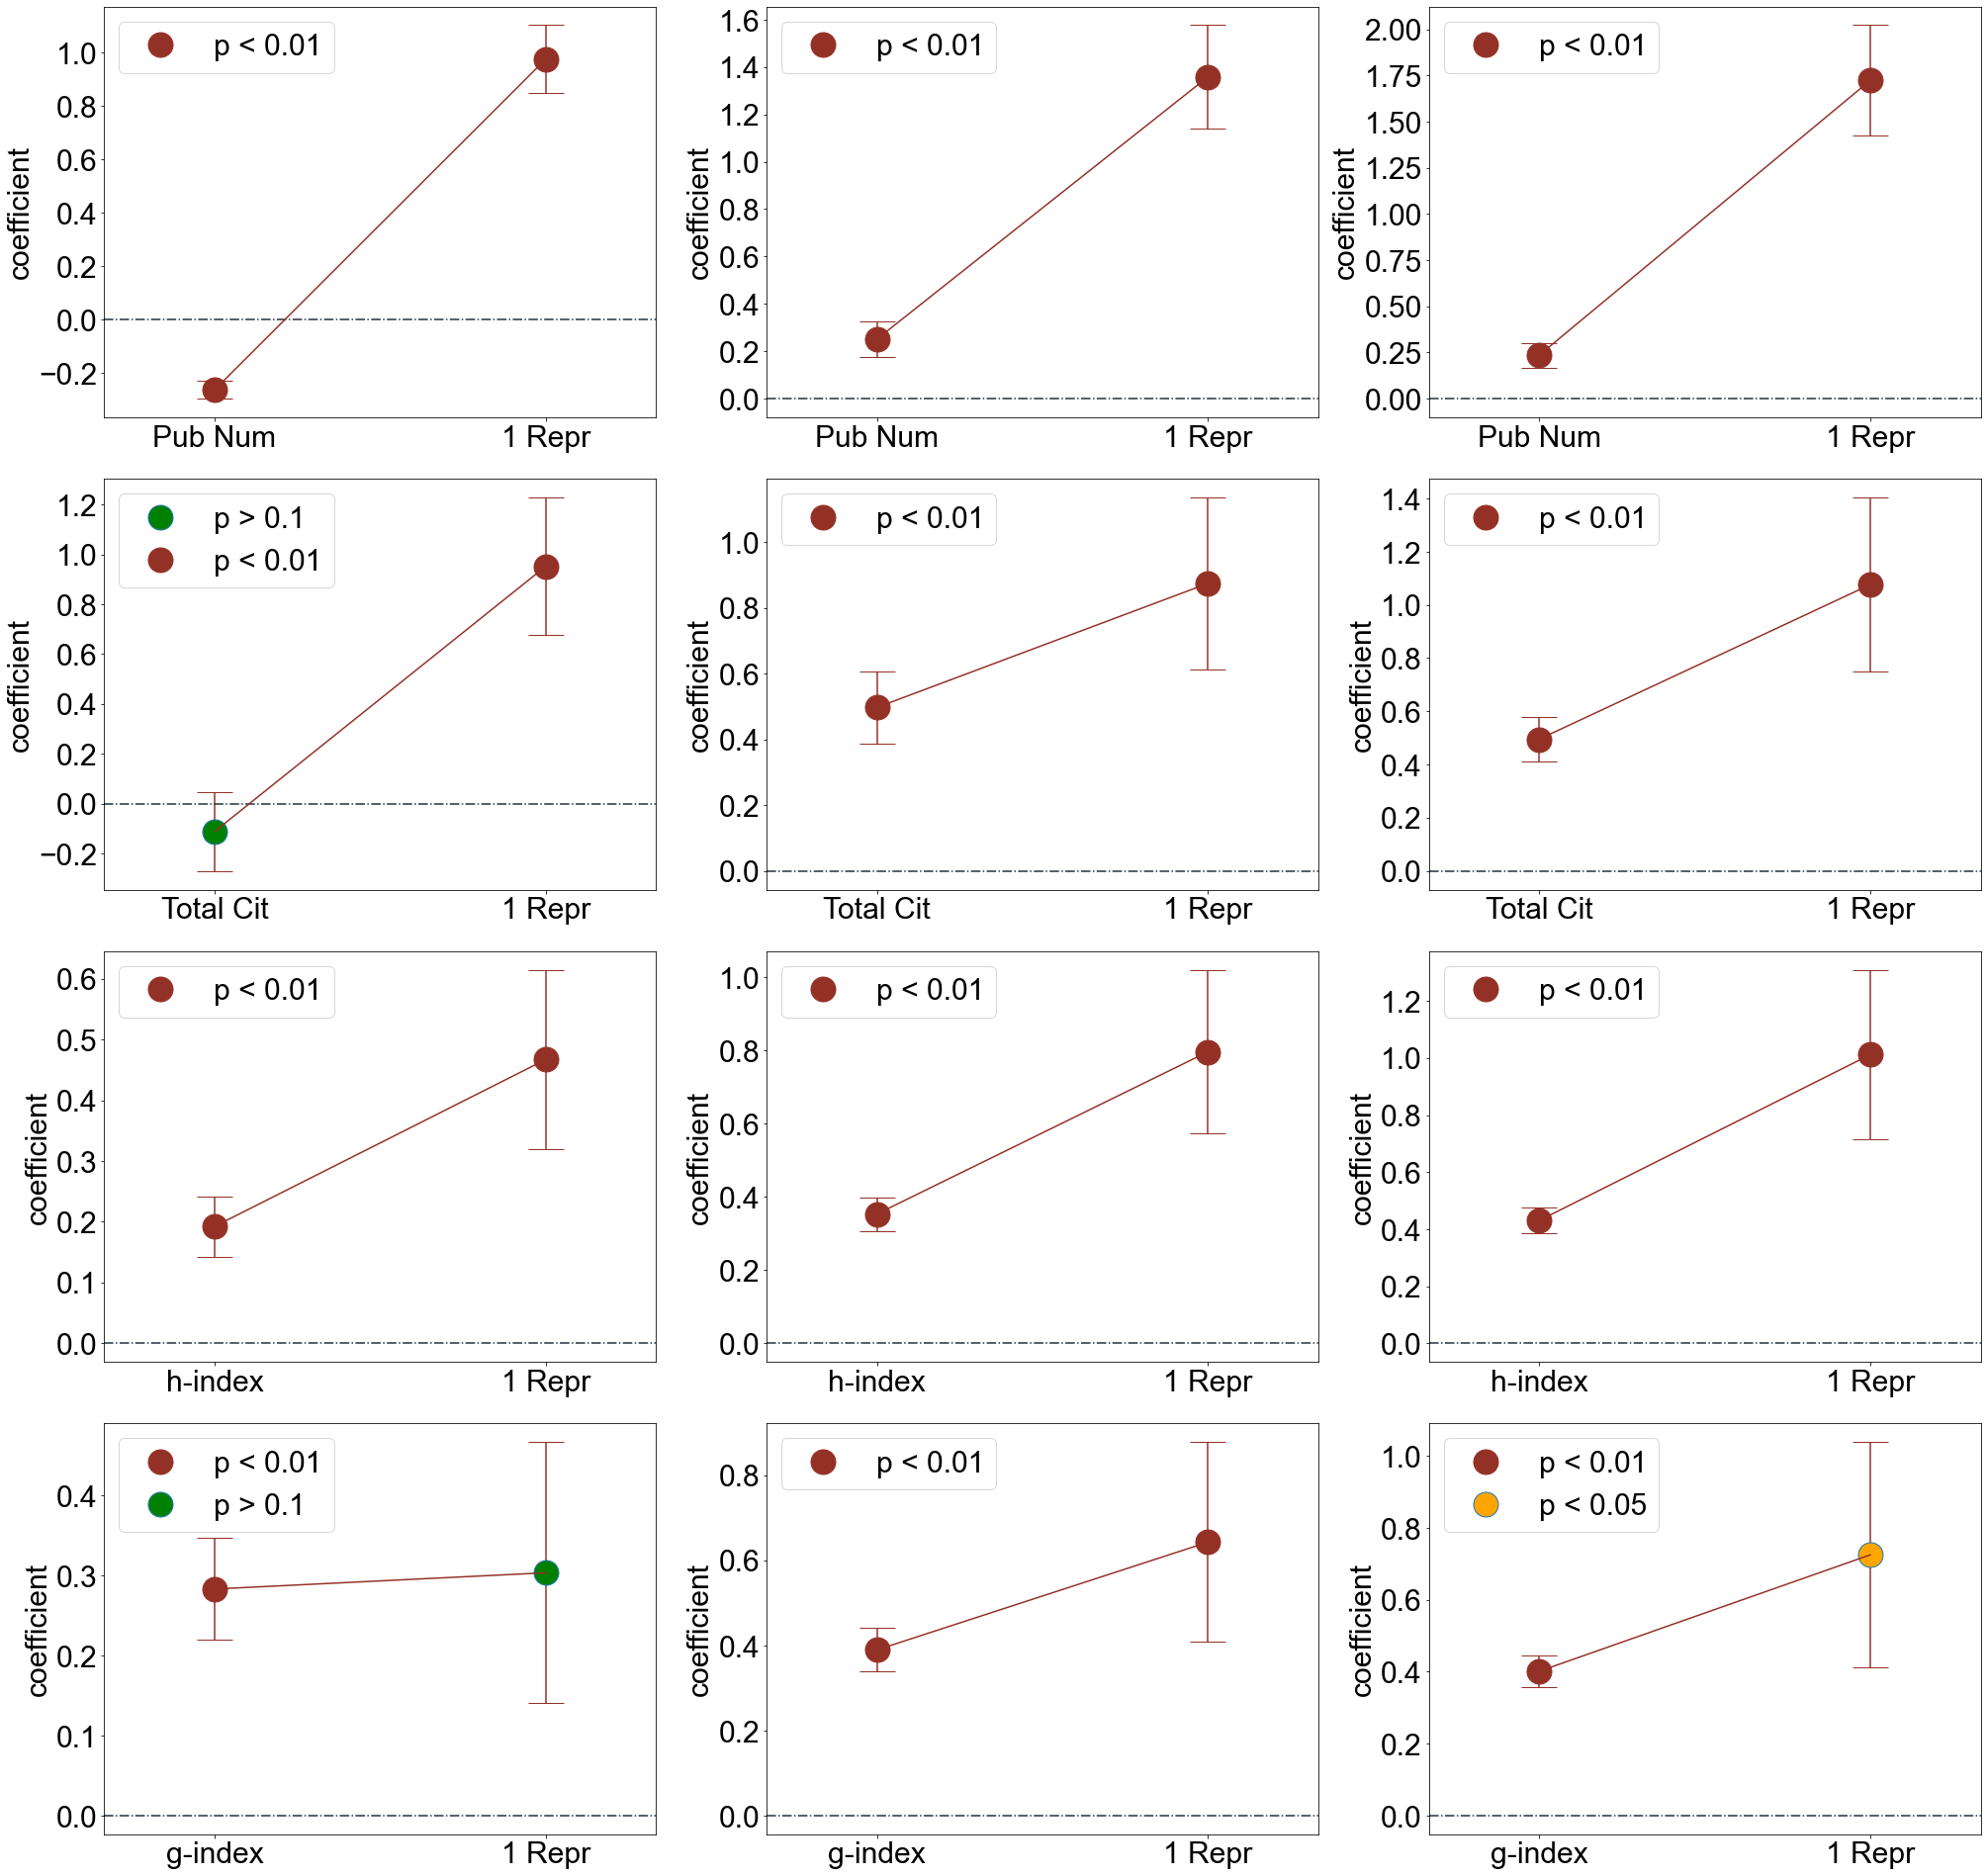

In [35]:
plt.subplots(4,3,figsize=(34,34))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.20,hspace=0.15)
for j in range(3):
    f = [ff1 , ff2 , ff3][j]
    predictors1 = plst1[j]
    for i in range(4):
        print(i,j)
        predictors2 = plst2[i]
        predictors = [predictors2 , predictors1]
        draw(i , j , f , predictors)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\PNAS representative evaluation\figs\fig 6\2.pdf",bbox_inches = 'tight')

In [11]:
fLau1.describe()

,pub num,total cit,h,g,max cit,max2,max3,max4,max5,If Prize
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,117.858333,12431.775000,34.341667,74.708333,2412.425000,1822.725000,1473.881944,1265.245833,1116.132917,1.0
std,144.854682,14617.629614,26.498611,63.969320,2917.184102,2089.525744,1636.871956,1382.407276,1208.762477,0.0
min,1.000000,69.000000,1.000000,1.000000,42.000000,33.500000,23.000000,17.250000,17.250000,1.0
25%,22.500000,1157.750000,10.000000,22.500000,453.750000,378.375000,289.833333,254.062500,224.200000,1.0
50%,73.000000,5533.500000,31.000000,60.000000,1031.500000,752.500000,631.333333,573.625000,542.600000,1.0
75%,163.000000,20450.750000,52.250000,111.000000,3354.000000,2488.250000,2096.416667,1809.125000,1621.550000,1.0
max,942.000000,74724.000000,102.000000,273.000000,14791.000000,8499.000000,6545.000000,5356.000000,4601.200000,1.0


In [12]:
fLau2.describe()

,pub num,total cit,h,g,max cit,max2,max3,max4,max5,If Prize
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.0
mean,276.385965,25022.359649,59.263158,113.210526,3169.026316,2497.114035,2008.412281,1712.846491,1499.026316,1.0
std,285.595032,29982.136916,38.858275,79.261690,5994.894421,5653.784789,4112.274134,3321.220754,2756.464512,0.0
min,1.000000,60.000000,1.000000,1.000000,33.000000,27.000000,24.333333,22.000000,22.000000,1.0
25%,81.250000,5000.750000,30.500000,49.250000,588.500000,511.125000,436.833333,372.812500,342.400000,1.0
50%,174.000000,15659.500000,55.000000,99.500000,1639.500000,1268.000000,1034.333333,935.125000,845.100000,1.0
75%,373.750000,33724.000000,83.500000,160.750000,3551.500000,2921.750000,2421.750000,2001.937500,1749.250000,1.0
max,1401.000000,162304.000000,186.000000,397.000000,57449.000000,57449.000000,40877.000000,32591.000000,26624.000000,1.0


In [13]:
fLau3.describe()

,pub num,total cit,h,g,max cit,max2,max3,max4,max5,If Prize
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,178.244094,24646.464567,60.771654,114.669291,3277.401575,2365.751969,1910.741470,1635.120079,1443.378740,1.0
std,188.731342,25059.748507,40.218488,79.692171,3948.572459,2711.162124,2066.475142,1704.717020,1462.040198,0.0
min,1.000000,69.000000,1.000000,1.000000,60.000000,50.000000,42.000000,37.000000,32.800000,1.0
25%,53.000000,5657.000000,28.000000,48.500000,766.000000,647.250000,576.166667,516.875000,467.400000,1.0
50%,120.000000,15260.000000,55.000000,99.000000,1933.000000,1423.500000,1176.666667,995.500000,892.200000,1.0
75%,239.000000,33823.000000,85.500000,170.000000,3614.500000,2861.000000,2390.000000,2126.000000,1942.000000,1.0
max,1313.000000,110130.000000,174.000000,331.000000,19238.000000,17151.000000,12664.333330,10189.000000,8626.200000,1.0
